# Unsupervised Exercise 1

## Implement k-Means clustering

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

### Preparation: Generate data to use for testing k-means clustering

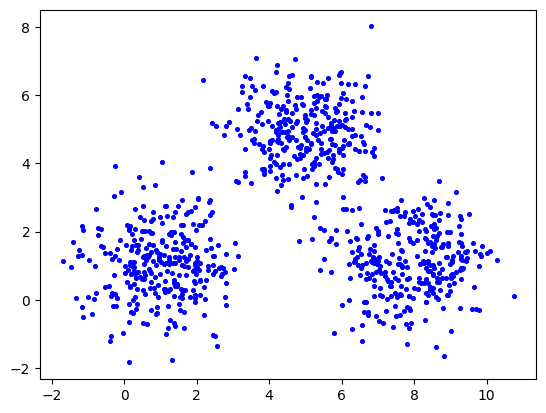

In [2]:
# generate random data 
gt_1 = np.array([1,1])
gt_2 = np.array([5,5])
gt_3 = np.array([8,1])
data_1 = np.random.randn(300,2) + gt_1
data_2 = np.random.randn(300,2) + gt_2
data_3 = np.random.randn(300,2) + gt_3
data = np.concatenate((data_1, data_2, data_3),axis = 0)
plt.scatter(data[:,0], data[:,1], s=7,c='b')

### Question 1: Implement function `k_means` below to perform K Means clustering without using `sklearn`:

In [3]:
import numpy as np

def k_means(data, k, centers):
    m, n = data.shape
    max_iters = 100
    for i in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis, :] - centers, axis=2)
        assignments = np.argmin(distances, axis=1)
        new_centers = np.array([data[assignments == j].mean(axis=0) for j in range(k)])
        # convergence
        if np.array_equal(centers, new_centers):
            break
        centers = new_centers
    wcss = np.sum([np.sum((data[assignments == j] - centers[j])**2) for j in range(k)])
    return centers, assignments, wcss


In [4]:
# Comparison with scikit-learn KMeans
from sklearn.cluster import KMeans
initial_centers = data[np.random.randint(data.shape[0],size=3)]
sklearn_kmeans = KMeans(n_clusters=3, init=initial_centers, max_iter=100, n_init=1)
sklearn_kmeans.fit(data)
final_centers, final_assignments, custom_wcss = k_means(data, 3, initial_centers)
print("Custom Implementation WCSS:")
print(custom_wcss)

print("Scikit-learn KMeans Inertia:")
print(sklearn_kmeans.inertia_)

Custom Implementation WCSS:
1796.4639287437458
Scikit-learn KMeans Inertia:
1796.4639287437453


After testing it, I realized that even with setting max_iters = 100, it does not take too much time so I will keep it like that for the moment. We can also see similar (very close, almost alike) values for WCSS and Scikit-learn KMeans Inertia.

**Checking that your model works**:
You can use Question 2a code below to test your code

### Additional instructions:
When implemeting the function, please make sure to:

**1. Pay attention to your model's run time.**
If your implementation is inefficient, if it will be very slow and will not work on a large number of observations, your model might be useless for real large data in production code.  
Some signs of inefficient code:
1. Usage of loops (especially loops per number of observations, a number that might be extremely big).
2. Usage of a lot of data types and data structures conversions, expecially something that happens inside a loop.
3. Growing data structures - appending 1 by 1 to a growing array

Almost everything you can do with the above, you can do with Numpy arrays operations that work on the whole array at once.

**2. Don't use higher level functions**

Since this is an exercise where we would like to get our hands dirty and to feel what it's like to implement a model from scratch, use mostly built-in Numpy functions, don't use a higher level functions that do most of the work for us, like sklearn distance functions.

**3. Make sure your WCSS calculation is correct**

Consider comparing to `inertia_` parameter of real `sklearn.cluster.KMeans`

### Question 2: Test your k-means function with the generated data

New cluster centers:
 [[4.96576498 4.94077025]
 [7.89039622 1.10510668]
 [0.98200454 1.06637635]]


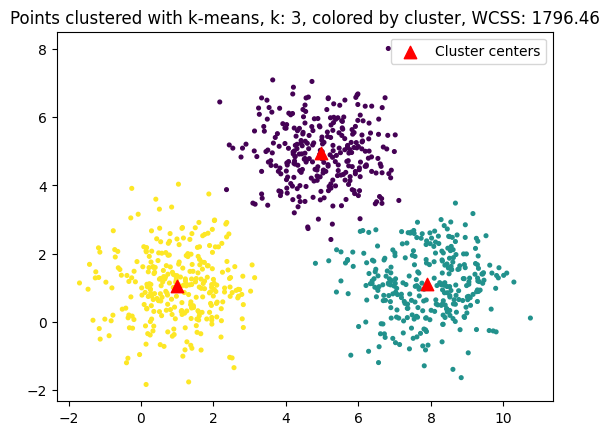

In [5]:
def cluster_and_plot(data, k):
    # pick random centers to be initial cluster centers
    initial_centers = data[np.random.randint(data.shape[0],size=k)]

    # cluster with k-means
    centers, assign, wcss = k_means(data, k, initial_centers)

    print('New cluster centers:\n', centers)

    # plot the data-point and the new clusters
    plt.scatter(data[:,0], data[:,1], s=7, c=assign)
    plt.scatter(centers[:,0], centers[:,1], marker='^', c='r', s=80, label='Cluster centers');
    plt.legend()
    plt.title(f'Points clustered with k-means, k: {k}, colored by cluster, WCSS: {round(wcss, 2)}');
cluster_and_plot(data, 3)

#### Questions:
- **2a.** Using `cluster_and_plot` function above and your `k-means` function, cluster into 3 clusters and plot the `data` that was generated earlier
- **2b.** Would you say that clustering is good?
- **2c.** Now cluster into 4 clusters
- **2d.** Compare the WCSS of clustering into 3 & 4 clusters.  What's your conclusion?
- **2e.** Plot different k values and their WCSS values.  How many clusters would you classify into and why?

2b. We can see that the clustering is very good, even without knowing the real initial centers we can see clearly the 3 different distinct groups.

New cluster centers:
 [[5.39889524 5.52722376]
 [7.93535965 1.09203967]
 [0.97903914 1.0574315 ]
 [4.50768516 4.22732373]]


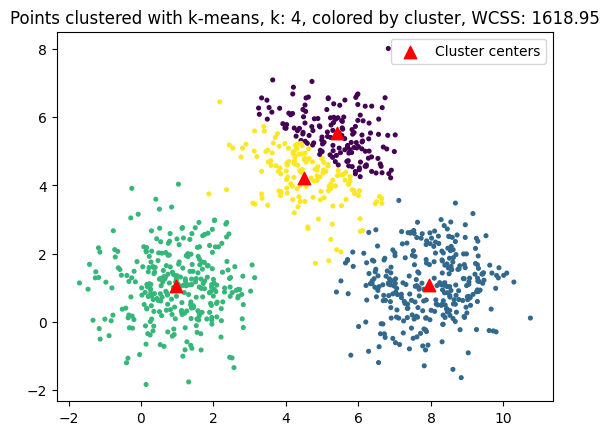

In [6]:
# 2.c

cluster_and_plot(data, 4)

In [7]:
# 2d

k = 3
initial_centers = np.array([[2, 2], [6, 6], [10, 2]])
centers1, assignments1, wcss1 = k_means(data, k, initial_centers)

k = 4
initial_centers = np.array([[2, 2], [6, 6], [10, 2], [8, 8]])
centers2, assignments2, wcss2 = k_means(data, k, initial_centers)

print("WCSS for 3 Clusters:", wcss1)
print("WCSS for 4 Clusters:", wcss2)



WCSS for 3 Clusters: 1796.4639287437458
WCSS for 4 Clusters: 1584.0327074391157


Lower WCSS values generally indicate better-defined and more compact clusters. In this case, the lower WCSS for 4 clusters suggests that using 4 clusters provides a better fit to the data compared to using 3 clusters.

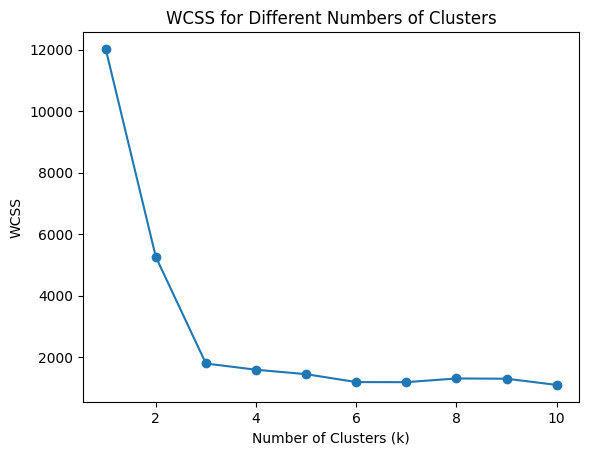

In [8]:
# 2e
k_values = range(1, 11)
wcss_values = []
for k in k_values:
    centers, assignments, wcss = k_means(data, k, centers=np.random.rand(k, data.shape[1]))
    wcss_values.append(wcss)

# Plot the WCSS values for different cluster counts
plt.plot(k_values, wcss_values, marker='o')
plt.title('WCSS for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


using the elbow method, I would chose 3 clusters as we can see we obtain close results to clustering with 4 centers but it makes more sense just by looking at it.

### Question 3: Use your k-means function for image quantization

**Question 3a.** Run the following code to perform image quantization on an image `flower.jpg`.  

**Tip**: if the algorithm doesn't converge, or the image is not clear, check the data types of your Numpy arrays (which data type would you need for best precision?) 

WCSS channel 0: 25603274
WCSS channel 1: 24351193
WCSS channel 2: 17646994


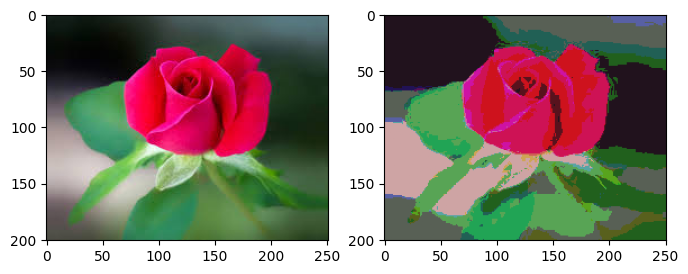

In [9]:
from PIL import Image
import scipy.misc

def apply_clustering(im):
    [width, height, color] = im.shape
    out = np.zeros_like(im)
    k = 3
    # apply clustering on each color channel
    for col_channel in range(color):
        # prepare 
        channel_vals = im[:,:,col_channel].ravel()
        data = np.expand_dims(channel_vals,1)

        #prepare random centers and call K_means method
        centers = data[np.random.randint(data.shape[0], size=k)]
        centers, assign, wcss = k_means(data, k, centers)
        print(f'WCSS channel {col_channel}: {int(wcss)}')
        
        #transform the colors in the image accirding to the clustering
        for i in range(k):
            channel_vals[assign == i] = centers[i]
        gray = np.reshape(channel_vals, [width, height])
        out[:,:,col_channel] = gray
    return out

# read image and apply clustering 
im1 = np.array(Image.open("flower.jpg"))
out1 = apply_clustering(im1)

# show input vs output
plt.figure(1,figsize=(8,16))
plt.subplot(1,2,1);
plt.imshow(im1);
plt.subplot(1,2,2);
plt.imshow(np.float32(out1)/255);

**Bonus Question 3b:** Approximately by what magnitute can the image size be reduced after clustering to the image?  Explain why.

Clustering groups similar colors in images, . This process, like k-means color quantization, trims file sizes, but choosing higher compression ratios can impact image quality. It's a trade-off between smaller file sizes and acceptable image fidelity.